<a href="https://colab.research.google.com/github/mariefeliciabeclin/mariefeliciabeclin.github.io/blob/master/Suites_de_fonction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suite de fonction, convergence simple , convergence uniforme**
## Maths PEIP Montpellier semestre 3

## Import et paramétrage du notebook

In [101]:
%matplotlib inline
from ipywidgets import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
from matplotlib.widgets import Button, Slider

import jax
import jax.numpy as jnp
import matplotlib.animation as animation
from IPython import display

def plot_suite(f :  Callable, x_min = 0, x_max = 5, N=10):
  X = np.linspace(x_min,x_max,1000)
  fig, ax = plt.subplots(1,1, figsize = (15,5))
  for n in range(1,N):
    ax.plot(X,[f(2*n,x) for x in X], label='n='+str(2*n))
    ax.legend()

# 1)La suite de fonction $f_{n} : x 	\rightarrow e^{-xn}$

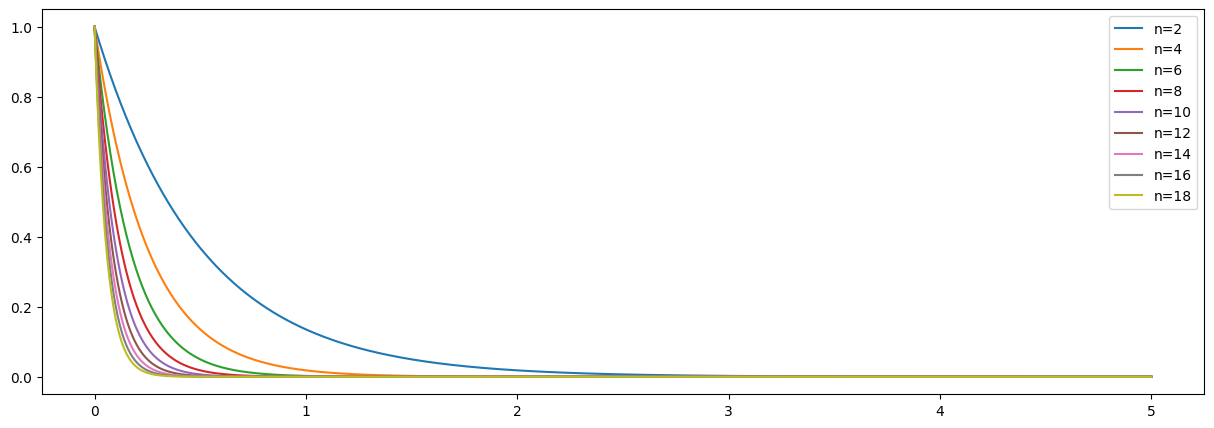

In [61]:
def f(n :  int ,x : float)-> float:
  return np.exp(-n*x)

plot_suite(f)


# 2) La suite de fonction $f_{n} : x 	\rightarrow (1-x)e^{-xn}$



## a) Convergence Simple
> Pour des valeurs de $x_0$ différentes, traçons les suites numériques $(f_n(x_0))_{n\in \mathbb{N}}$.

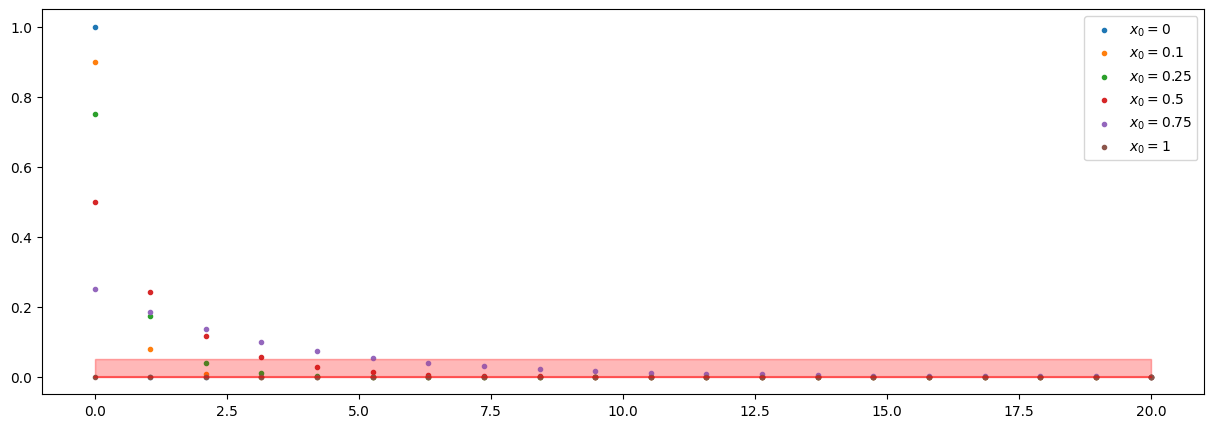

In [83]:
def f(n :  int ,x : float)-> float:
  return (1-x)*(x**n)

fig, ax = plt.subplots(1,1,figsize=(15,5))
X = [0,0.1,0.25,0.5,0.75,1]
N = np.linspace(0,20,20)
epsilon = 0.05
for x in X:
   plt.scatter(N ,f(N,x) , label ="$x_{0}=$"+str(x) , marker ='.')
   plt.plot(N, [0]*20, color ='red', alpha = 0.1)
   plt.fill_between(N,[epsilon]*20, color ='red', alpha = 0.05)
   plt.legend()




> Pour chaque $x_{0}$, $f_{n}(x_0) → 0$. La suite $f_n$ converge simplement vers la fonction nulle.




## b) Convergence Uniforme



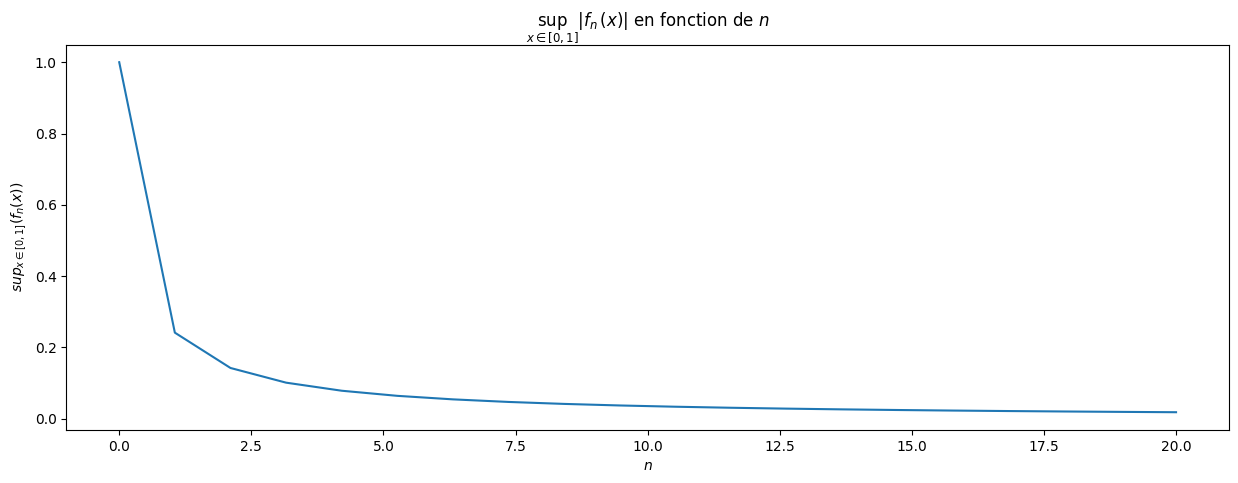

In [88]:
def supf(n :  int ,x : np.array)-> float:
  return np.max([(1-x)*(x**n) for x in X])

fig, ax = plt.subplots(1,1,figsize=(15,5))
X = np.linspace(0,1,500)
N = np.linspace(0,20,20)
epsilon = 0.05
ax.plot(N ,[supf(n,X) for n in N] )
ax.set_title('$\sup_{x \in [0,1]} |f_n(x)|$ en fonction de $n$')
ax.set_ylabel('$sup_{x \in [0,1]}(f_n(x))$')
ax.set_xlabel('$n$')
plt.show()

$\sup_{x \in [0,1]} |f_n(x)| → 0$ donc la suite $(f_n)_{n \in \mathbb{N}}$ converge uniformément vers la fonction nulle sur $[0,1]$


## c) Zoom sur les suites de la forme  $ u_n : =\biggl(\frac{1}{1+\frac{1}{n^{\alpha}}}\biggr)^{n}$ ; $\alpha \in \mathbb{R}^{+*}$

La suite numérique, $(u_n)_{n\in \mathbb{N}}$ défini comme $ u_n : =\biggl(\frac{1}{1+\frac{1}{n}}\biggr)^{n}$.

Etudions la convergence de cette suite.

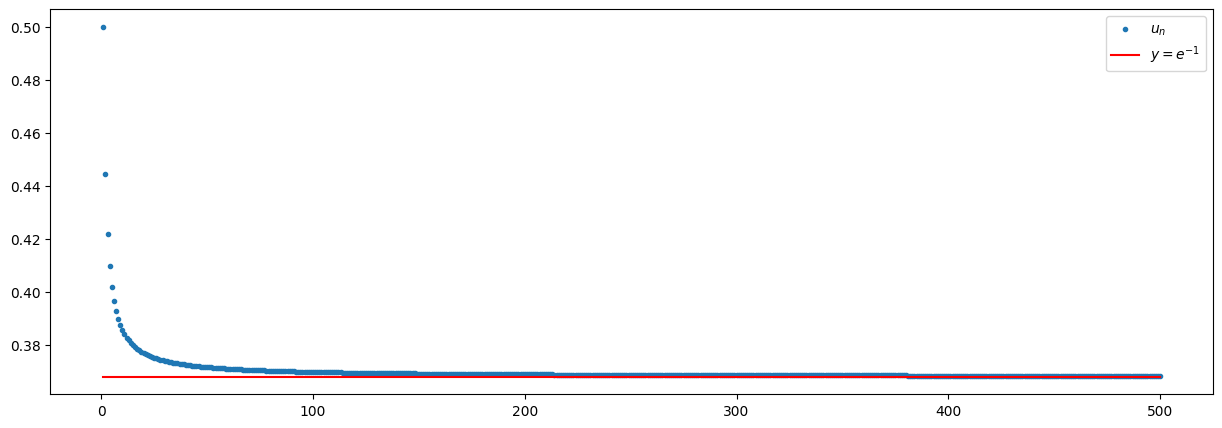

In [77]:
def u(n: int) -> int:
  return (1/(1+(1/n)))**n
fig, ax = plt.subplots(1,1, figsize = (15,5))
N = np.linspace(1,500,500)
ax.scatter(N,u(N), marker='.', label = '$u_{n}$')
ax.plot(N, [1/(np.exp(1))]*500, color='red', label ='$y=e^{-1}$')
ax.legend()

###La suite numérique, $(u_n)_{n\in \mathbb{N}}$ défini comme $ u_n : =\biggl(\frac{1}{1+\frac{1}{\sqrt(n)}}\biggr)^{n}$.


Etudions la convergence de $u_n$

$$u_n  = e^{-n \ln(1+\frac{1}{\sqrt{n}})}$$

$$\ln(1+\frac{1}{\sqrt{n}}) = \frac{1}{\sqrt{n}} - \frac{1}{2n} + o(\frac{1}{n})  $$

$$-n\ln(1+\frac{1}{\sqrt{n}}) =-n^{1/2} +\frac{1}{2} + o(1)  $$

$$u_n \underset{n \rightarrow ∞}{=} e^{\frac{1}{2}}e^{-n^{1/2} + o(1)}  $$


D'ou $u_n \underset{n \rightarrow ∞}{\rightarrow} 0$


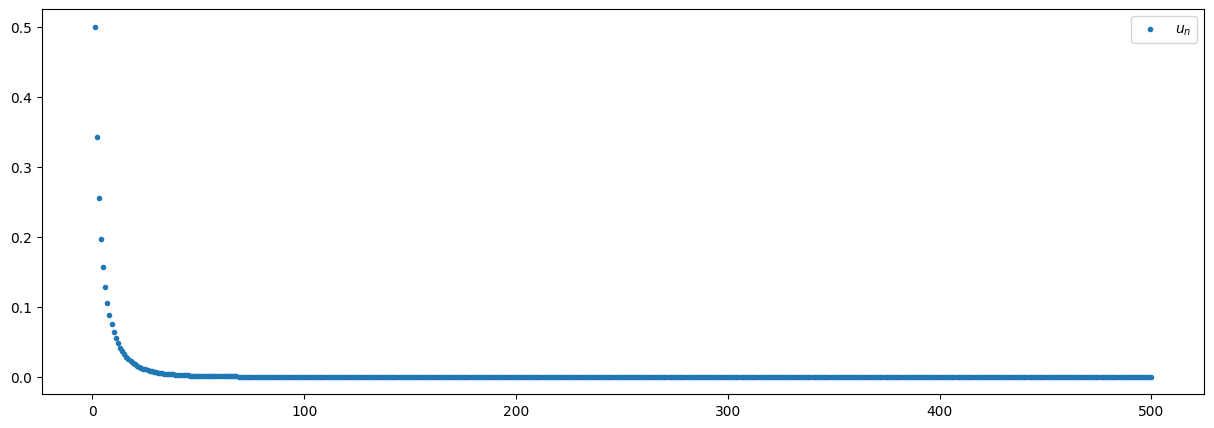

In [78]:
def u(n: int) -> int:
  return (1/(1+(1/np.sqrt(n))))**n
fig, ax = plt.subplots(1,1, figsize = (15,5))
N = np.linspace(1,500,500)
ax.scatter(N,u(N), marker='.', label = '$u_{n}$')
ax.legend()

### La suite numérique, $(u_n)_{n\in \mathbb{N}}$
défini comme $ u_n : = \biggl( \frac{1}{1+\frac{1}{n^{2}}} \biggr)^{n}$.


Etudions la convergence de $u_n$

$$u_n  = e^{-n \ln(1+\frac{1}{n^{2}})}$$

$$\ln(1+\frac{1}{\sqrt{n}}) = \frac{1}{n^{2}} - \frac{1}{2n^{4}} + o(\frac{1}{n^{4}})  $$

$$-n\ln(1+\frac{1}{\sqrt{n}}) =-\frac{1}{n} -\frac{1}{2n^{3}} + o(1)  $$

$$u_n \underset{n \rightarrow ∞}{=} e^{-\frac{1}{n} -\frac{1}{2n^{3}} + o(1)}  $$

$$u_n \underset{n \rightarrow ∞}{=} 1 + o(1)  $$

D'ou $u_n \underset{n \rightarrow ∞}{\rightarrow} 1$

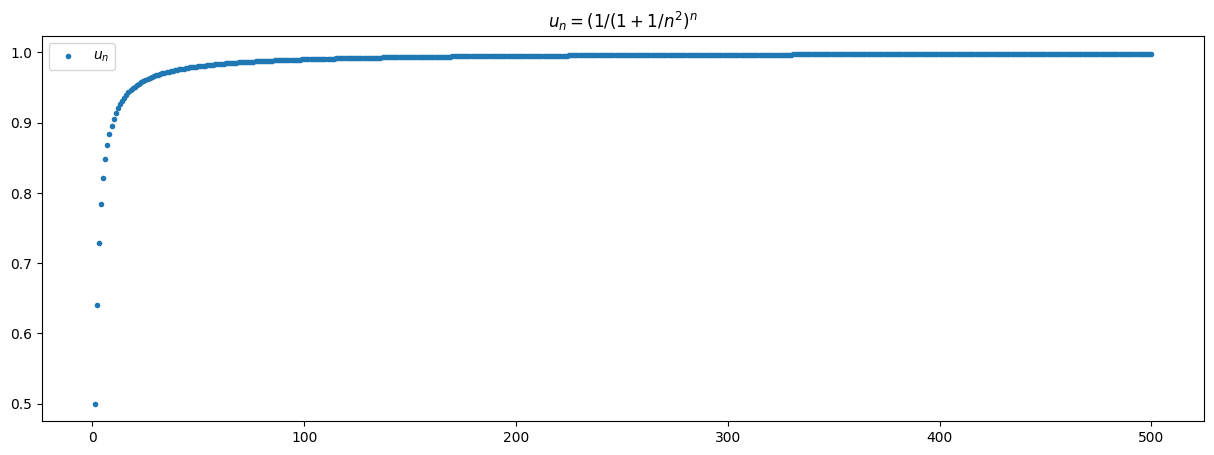

In [79]:
def u(n: int) -> int:
  return (1/(1+(1/n**2)))**n
fig, ax = plt.subplots(1,1, figsize = (15,5))
N = np.linspace(1,500,500)
ax.scatter(N,u(N), marker='.', label = '$u_n$')
ax.set_title("$u_n=(1/(1+1/n^{2})^{n}$")
ax.legend(markerscale = 1)

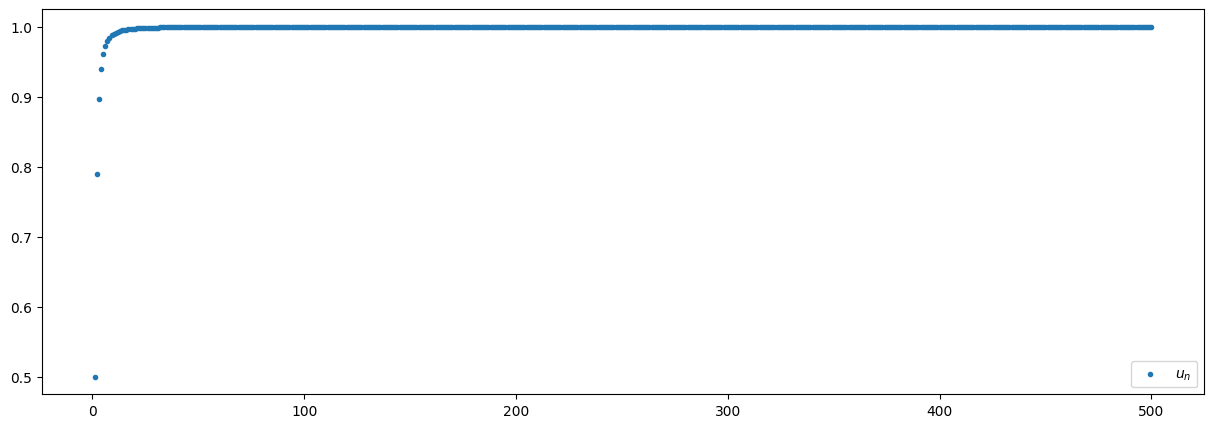

In [80]:
def u(n: int) -> int:
  return (1/(1+(1/n**3)))**n
fig, ax = plt.subplots(1,1, figsize = (15,5))
N = np.linspace(1,500,500)
ax.scatter(N,u(N), marker='.', label = '$u_{n}$')
ax.legend()

interactive(children=(FloatSlider(value=1.0, description='a', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

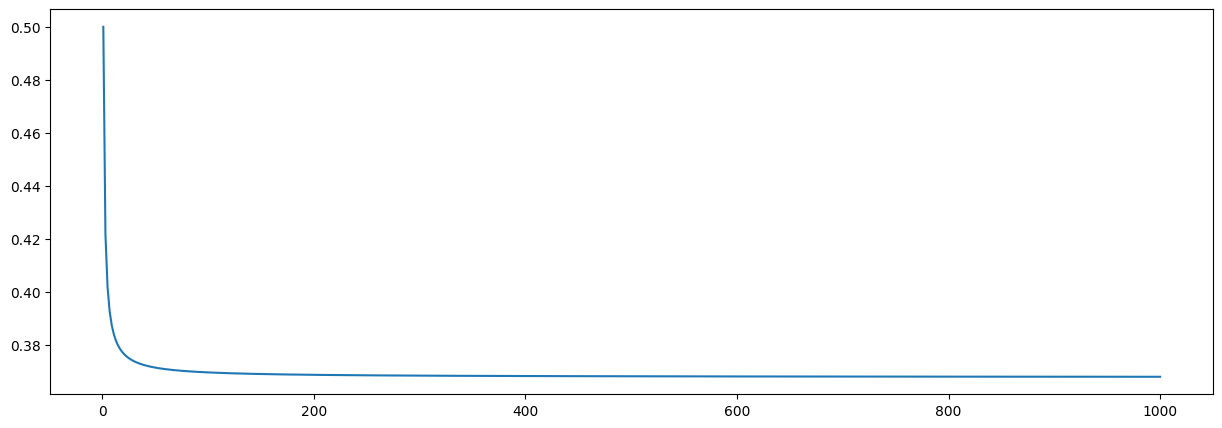

In [81]:
def u(n: int, a : float) -> int:
  return (1/(1+(1/n**a)))**n

N = np.linspace(1,1000,500)

# Define initial parameters
init_a = 1
fig, ax = plt.subplots(1,1,figsize=(15,5))
line, = ax.plot(N, u(N, init_a))

def update(a=1.0):
    line.set_ydata(u(N, a))
    fig.canvas.draw()

interact(update);
plt.show()



# 3) Les suites $f_{n} : x 	\rightarrow e^{-xn} sin(\lambda n x)$ et $g_{n} : x 	\rightarrow e^{-xn} cos(\lambda n x)$

# 4) La suite $f_{n} : x 	\rightarrow (1+\frac{x}{n})^{n}$ pour $x \in  [-n,n]$

In [95]:
def f(n,x):
  if x >n:
    return 0
  elif x<-n:
    return 0
  else :
    return (1+x/n)**n

## Convergence simple

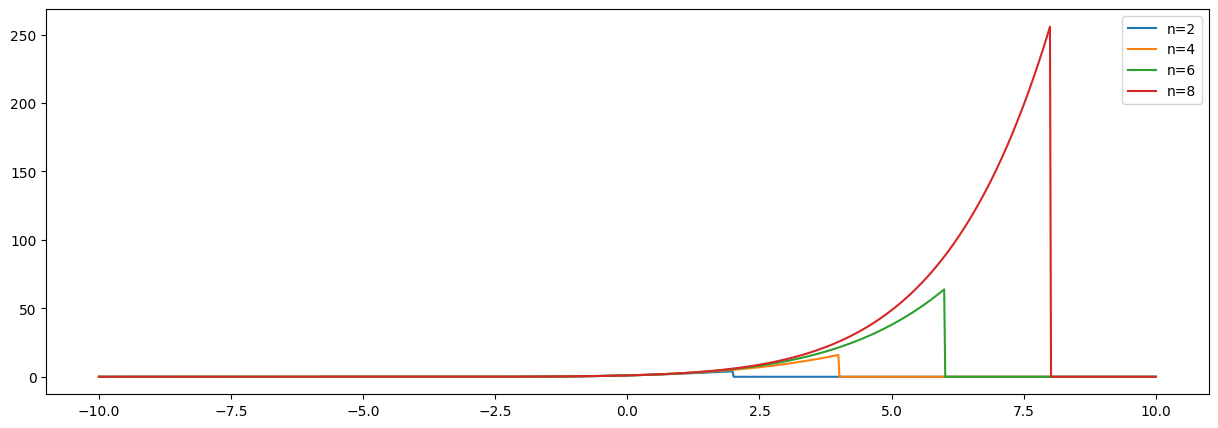

In [102]:
plot_suite(f, x_min = -10, x_max = 10, N = 5)